Aquest exemple està adaptat a partir de https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## Rang de valors de les variables difuses

In [3]:
food_quality = ctrl.Antecedent(np.arange(0, 11, 1),'qualitat del menjar')
service_quality = ctrl.Antecedent(np.arange(0,11,1), 'qualitat del servei')
tip = ctrl.Consequent(np.arange(0,26,1),'propina')

## Generació automàtica de funcions de pertinença

In [4]:
food_quality.automf(names=['dolenta','mitjana','bona'])
service_quality.automf(names=['dolent','acceptable','increïble'])

## Definició de la funció de pertinença

S'utilitzen conjunts triangulars per al conseqüent.
Els punts del triangle s'introdueixen en sentit horari començant per l'extrem esquerre.

In [5]:
tip['baixa'] = fuzz.trimf(tip.universe,[0,0,13])
tip['mitjana'] = fuzz.trimf(tip.universe,[0,13,25])
tip['alta'] = fuzz.trimf(tip.universe, [13,25,25])

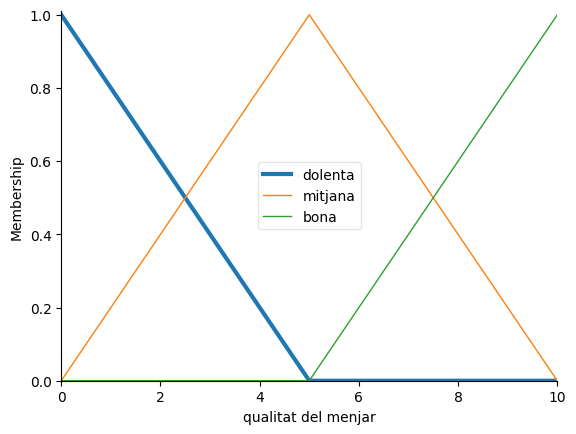

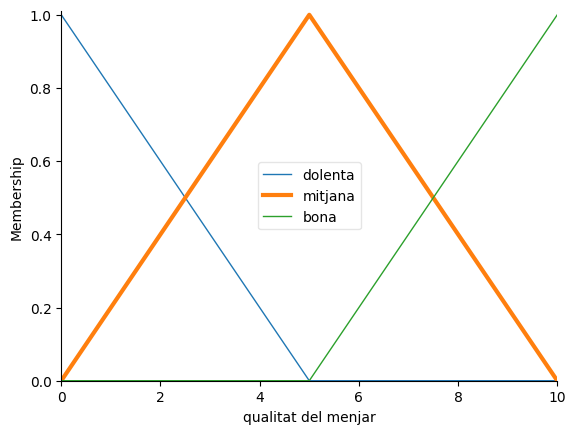

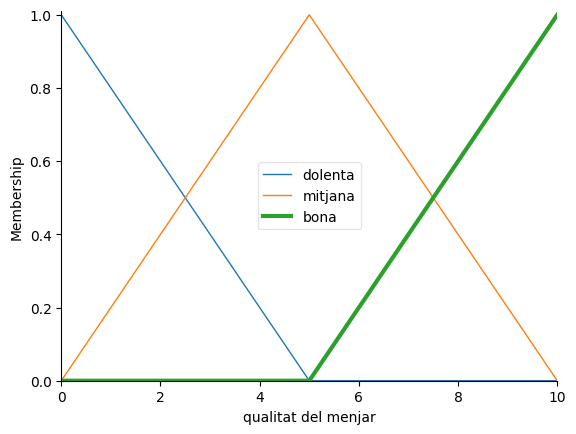

In [13]:
food_quality['dolenta'].view()
food_quality['mitjana'].view()
food_quality['bona'].view()

/home/carlos/Development/IEDIB_CEIA_2024-25/Modelos de Inteligencia Artificial/Bloque 2/fuzzy_tip/.venv/lib/python3.12/site-packages/skfuzzy/control/term.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


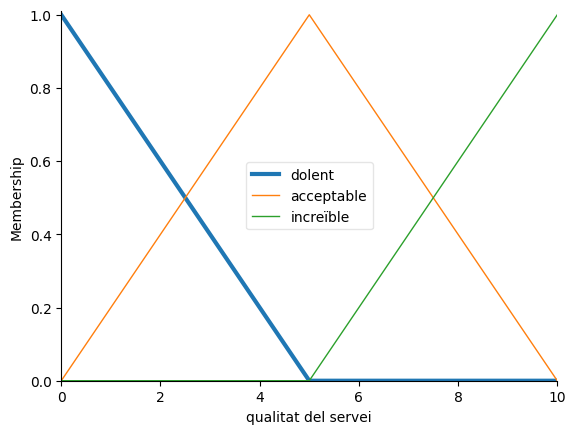

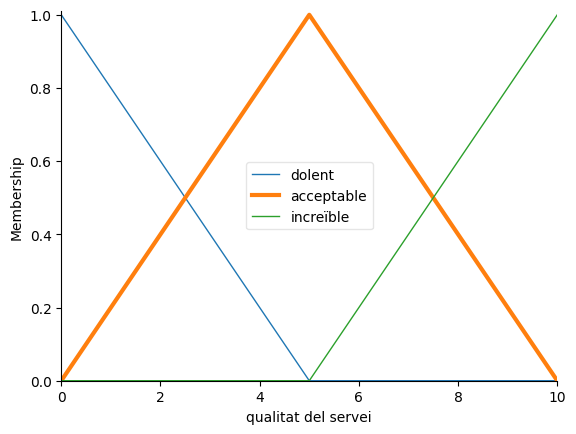

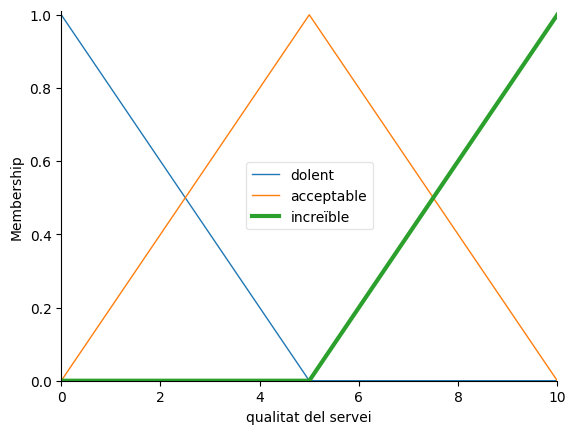

In [14]:
service_quality['dolent'].view()
service_quality['acceptable'].view()
service_quality['increïble'].view()

Es defineixen les regles i s'associen amb el sistema

In [7]:
tipping = ctrl.ControlSystemSimulation(ctrl.ControlSystem([
    ctrl.Rule(food_quality['dolenta'] | service_quality['dolent'], tip['baixa']),
    ctrl.Rule(service_quality['acceptable'] | service_quality['dolent'], tip['baixa']),
    ctrl.Rule(food_quality['bona'] | service_quality['increïble'], tip['alta'])
]))

Entrada del sistema en aquest exemple

In [8]:
tipping.inputs({
    'qualitat del menjar':7,
    'qualitat del servei':6
})

## Inferència i defuzzificació

In [9]:
tipping.compute()

## Resultat

In [10]:
print(tipping.output['propina'])

10.429100529100525


Podeu experimentar com canvia la sortida modificant els valors de les entrades qualitat del menjar i del servei. La sortida l'hem d'interpretar en percentatge.